In [1]:
from supervised_utils import *

In [2]:
# sopprimi i warning a runtime
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Task di regressione su `score`

#### Sul dataset iniziale `movies_adj_last30.csv`

In [3]:
df = pd.read_csv("../data/movies_adj_last30.csv")
print_info(df)

# cols: 14 | # rows: 4046

+----------+---------+
|  Column  |  Type   |
+----------+---------+
|    id    |  int64  |
|  title   | object  |
|  rating  | object  |
|  genre   | object  |
|   year   |  int64  |
|  score   | float64 |
|  votes   | float64 |
| director | object  |
|   star   | object  |
| country  | object  |
|  budget  | float64 |
|  gross   | float64 |
| company  | object  |
| runtime  | float64 |
+----------+---------+


In [4]:
# colonne per il training
cols = {
    "target": "score",
    "drop": ["id", "title", "company", "country", "director", "star"],
    "dummies": ["rating", "genre"],
    "labels": [],
    "standardize": ["runtime"],
    "minmax": ["votes", "budget", "gross"]
}

--------------------------------------------------------------------------------
TUNING & TRAINING [Ridge Regressor]...

Results after GridSearchCV:
Best parameters: {'alpha': 0.5}
Best score: {'mean_squared_error': 0.5192}

> TESTING...
MSE: 0.5772, MAE: 0.5527

--------------------------------------------------------------------------------
TUNING & TRAINING [Decision Tree Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best score: {'mean_squared_error': 0.5050}

Results after max_depth tuning:
Best parameters: {'max_depth': 10}
Best score: {'mean_squared_error': 0.5054}



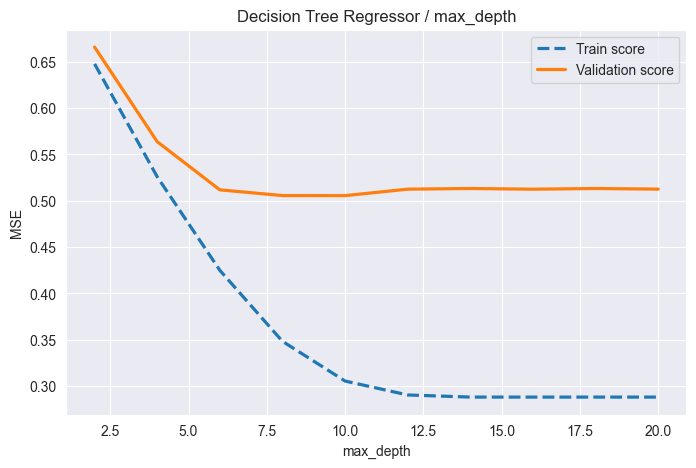

> TESTING...
MSE: 0.6150, MAE: 0.5596

--------------------------------------------------------------------------------
TUNING & TRAINING [Random Forest Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best score: {'mean_squared_error': 0.3875}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 280}
Best score: {'mean_squared_error': 0.3884}



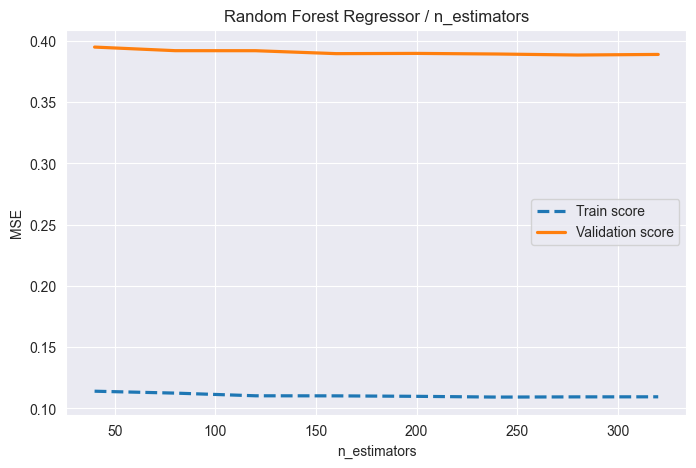

Results after max_depth tuning:
Best parameters: {'max_depth': 23}
Best score: {'mean_squared_error': 0.3874}



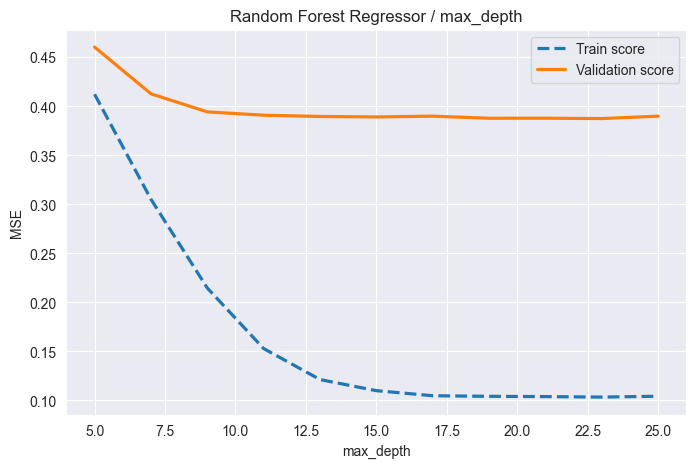

> TESTING...
MSE: 0.4645, MAE: 0.4743

--------------------------------------------------------------------------------
TUNING & TRAINING [XGBoost Regressor]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.6}
Best score: {'mean_squared_error': 0.3702}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 280}
Best score: {'mean_squared_error': 0.3701}



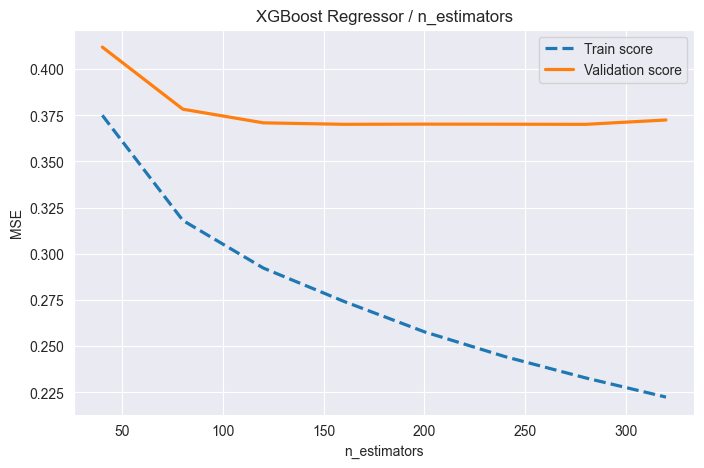

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'mean_squared_error': 0.3748}



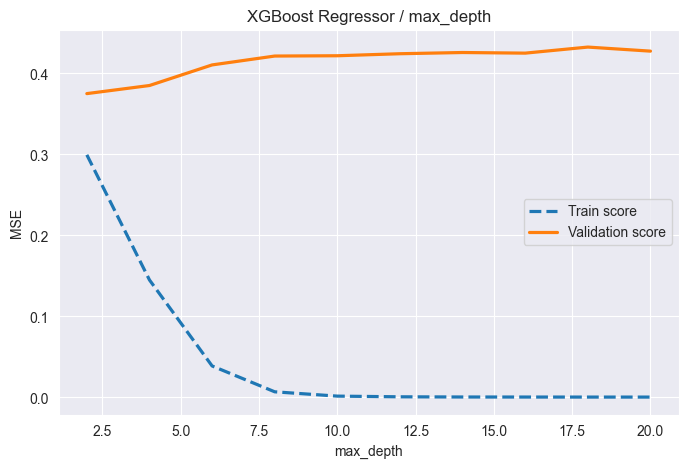

> TESTING...
MSE: 0.5165, MAE: 0.5018



In [5]:
# tuning e testing
tune_and_test_models(df, cols, task="regression", session_name="raw")

#### Sul dataset derivato `movies_features_last30.csv`

In [6]:
df = pd.read_csv("../data/movies_features_last30.csv")
print_info(df)

# cols: 23 | # rows: 4046

+----------------------------+---------+
|           Column           |  Type   |
+----------------------------+---------+
|             id             |  int64  |
|           title            | object  |
|          runtime           | float64 |
|         rating_cat         | object  |
|         genre_cat          | object  |
|       popularity_cat       | object  |
|         budget_cat         | object  |
|     budget_efficiency      | float64 |
|   budget_efficiency_cat    | object  |
|            age             |  int64  |
|           score            | float64 |
|        is_acclaimed        |  bool   |
|         is_panned          |  bool   |
|   director_age_in_movie    | float64 |
|    director_experience     |  int64  |
|   director_is_acclaimed    |  bool   |
|     director_is_panned     |  bool   |
| director_budget_efficiency | float64 |
|     star_age_in_movie      | float64 |
|      star_experience       |  int64  |
|     star_is_acclaimed      |

In [7]:
# colonne per il training
cols = {
    "target": "score",
    "drop": ["id", "title", "is_acclaimed", "is_panned", "budget_efficiency_cat"],
    "dummies": ["rating_cat", "genre_cat", "popularity_cat", "budget_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age_in_movie", "star_age_in_movie"],
    "minmax": ["director_experience", "star_experience"]
}

--------------------------------------------------------------------------------
TUNING & TRAINING [Ridge Regressor]...

Results after GridSearchCV:
Best parameters: {'alpha': 5}
Best score: {'mean_squared_error': 0.4669}

> TESTING...
MSE: 0.5226, MAE: 0.5255

--------------------------------------------------------------------------------
TUNING & TRAINING [Decision Tree Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 2}
Best score: {'mean_squared_error': 0.5770}

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'mean_squared_error': 0.5648}



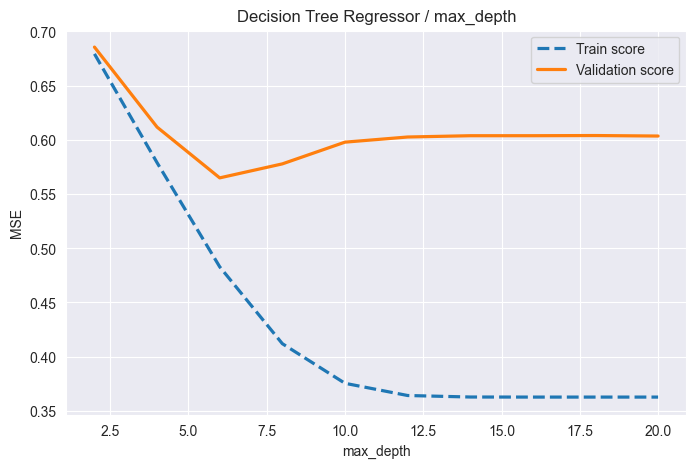

> TESTING...
MSE: 0.6915, MAE: 0.6159

--------------------------------------------------------------------------------
TUNING & TRAINING [Random Forest Regressor]...

Results after GridSearchCV:
Best parameters: {'criterion': 'squared_error', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best score: {'mean_squared_error': 0.4687}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 160}
Best score: {'mean_squared_error': 0.4686}



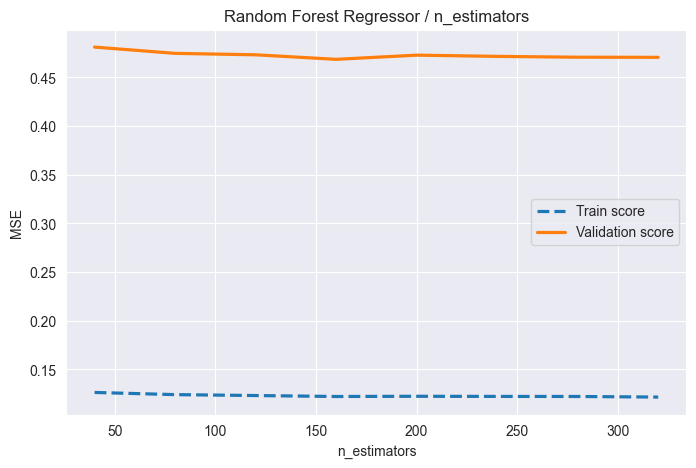

Results after max_depth tuning:
Best parameters: {'max_depth': 21}
Best score: {'mean_squared_error': 0.4707}



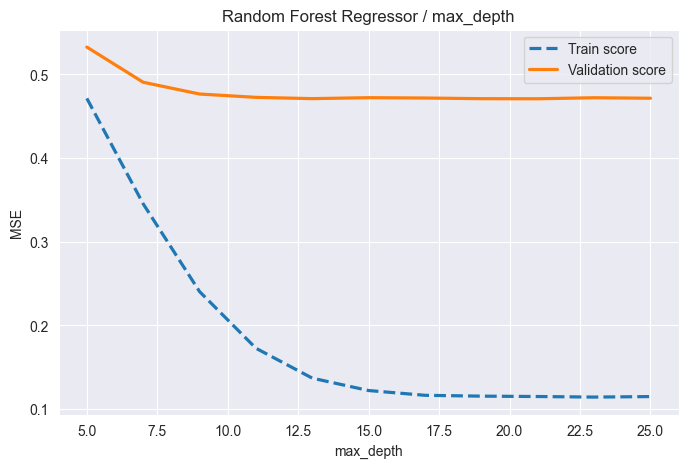

> TESTING...
MSE: 0.5364, MAE: 0.5367

--------------------------------------------------------------------------------
TUNING & TRAINING [XGBoost Regressor]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.6}
Best score: {'mean_squared_error': 0.4536}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 320}
Best score: {'mean_squared_error': 0.4516}



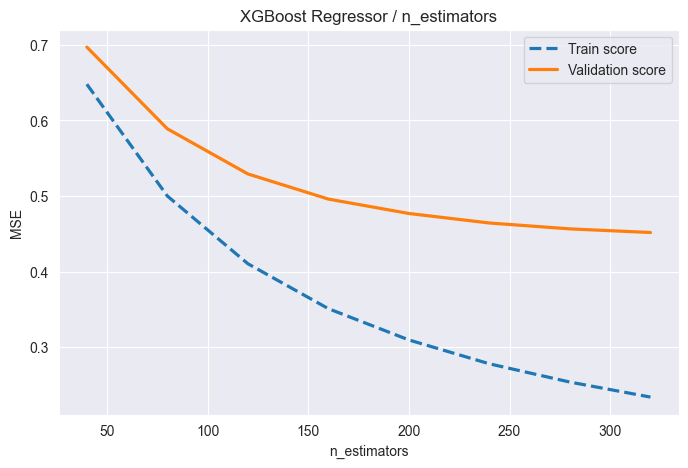

Results after max_depth tuning:
Best parameters: {'max_depth': 8}
Best score: {'mean_squared_error': 0.4534}



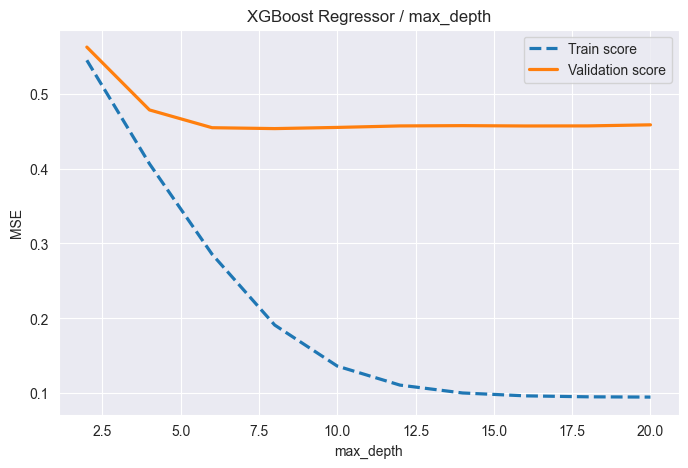

> TESTING...
MSE: 0.5234, MAE: 0.5296



In [8]:
# tuning e testing
tune_and_test_models(df, cols, task="regression", session_name="der")

### Task di classificazione su `budget_efficiency`

#### Sul dataset iniziale `movies_adj_last30.csv`

In [9]:
adj_df = pd.read_csv("../data/movies_adj_last30.csv")
features_df = pd.read_csv("../data/movies_features_last30.csv")
df = adj_df.merge(features_df[["id", "budget_efficiency_cat"]], on="id", how="left")

df = df[list(adj_df.columns) + ["budget_efficiency_cat"]]
print_info(df)

# cols: 15 | # rows: 4046

+-----------------------+---------+
|        Column         |  Type   |
+-----------------------+---------+
|          id           |  int64  |
|         title         | object  |
|        rating         | object  |
|         genre         | object  |
|         year          |  int64  |
|         score         | float64 |
|         votes         | float64 |
|       director        | object  |
|         star          | object  |
|        country        | object  |
|        budget         | float64 |
|         gross         | float64 |
|        company        | object  |
|        runtime        | float64 |
| budget_efficiency_cat | object  |
+-----------------------+---------+


In [10]:
# colonne per il training
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title", "company", "country", "director", "star", "gross"],
    "dummies": ["rating", "genre"],
    "labels": [],
    "standardize": ["runtime", "score"],
    "minmax": ["votes", "budget"]
}

--------------------------------------------------------------------------------
TUNING & TRAINING [Logistic Regression]...

Results after GridSearchCV:
Best parameters: {'max_iter': 20000, 'penalty': 'l1', 'solver': 'saga'}
Best score: {'accuracy': 0.4629}

> TESTING...
Accuracy: 42.5926%


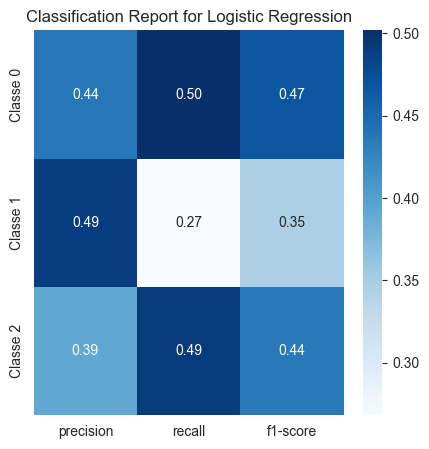

--------------------------------------------------------------------------------
TUNING & TRAINING [Decision Tree Classifier]...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score: {'accuracy': 0.6007}

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'accuracy': 0.5955}



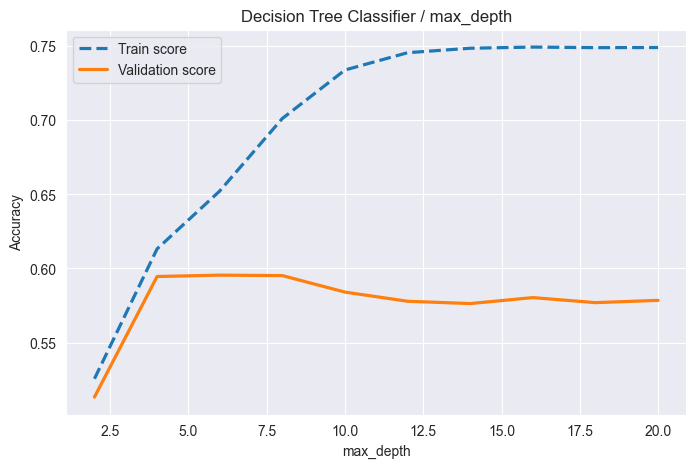

> TESTING...
Accuracy: 54.5679%


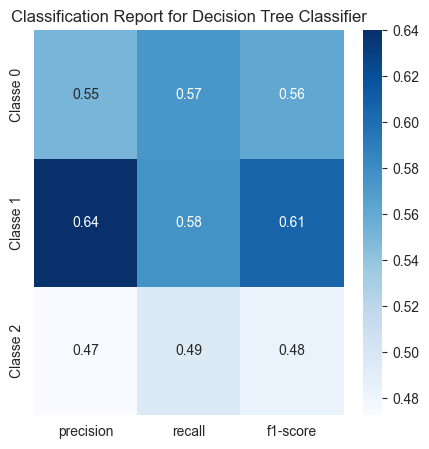

--------------------------------------------------------------------------------
TUNING & TRAINING [Random Forest Classifier]...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best score: {'accuracy': 0.6378}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 160}
Best score: {'accuracy': 0.6354}



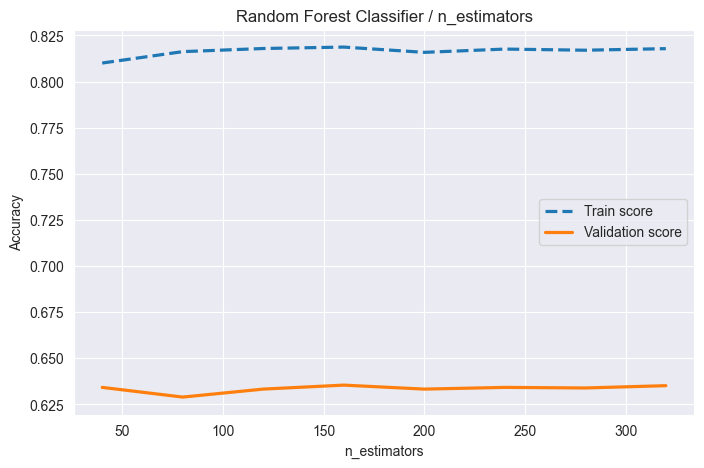

Results after max_depth tuning:
Best parameters: {'max_depth': 23}
Best score: {'accuracy': 0.6406}



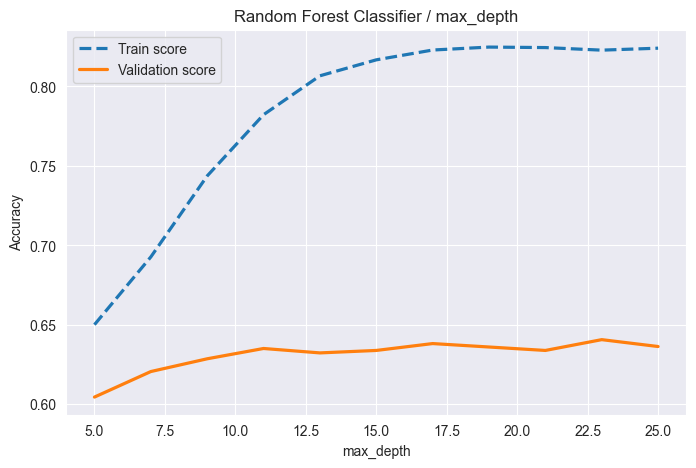

> TESTING...
Accuracy: 60.6173%


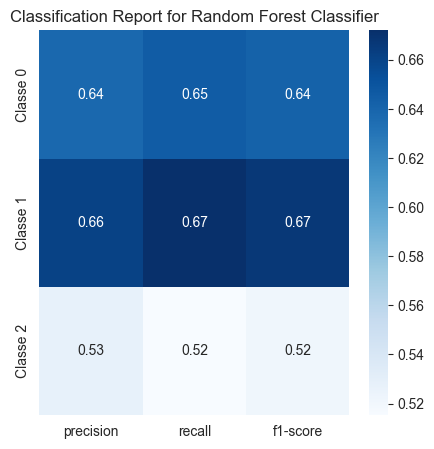

--------------------------------------------------------------------------------
TUNING & TRAINING [XGBoost Classifier]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.6}
Best score: {'accuracy': 0.6551}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 120}
Best score: {'accuracy': 0.6496}



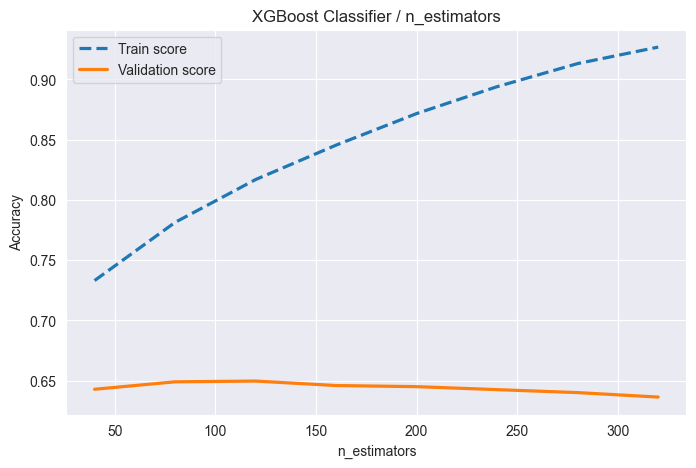

Results after max_depth tuning:
Best parameters: {'max_depth': 2}
Best score: {'accuracy': 0.6520}



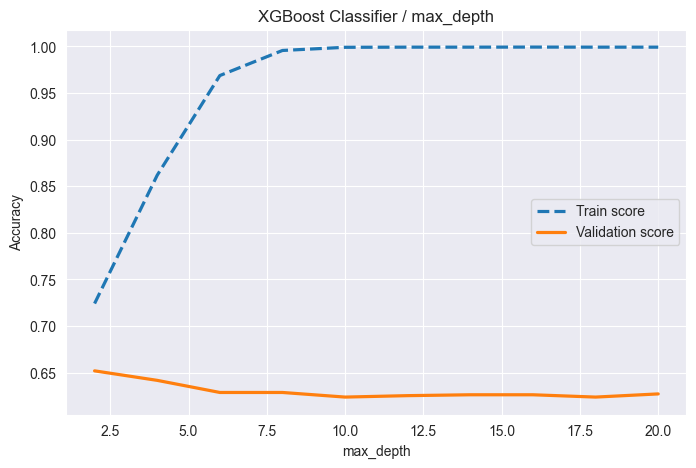

> TESTING...
Accuracy: 60.6173%


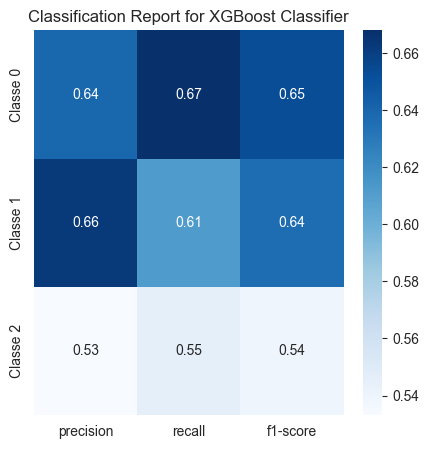

In [11]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=False, session_name="raw")

#### Sul dataset derivato `movies_features_last30.csv`

In [12]:
df = pd.read_csv("../data/movies_features_last30.csv")
print_info(df)

# cols: 23 | # rows: 4046

+----------------------------+---------+
|           Column           |  Type   |
+----------------------------+---------+
|             id             |  int64  |
|           title            | object  |
|          runtime           | float64 |
|         rating_cat         | object  |
|         genre_cat          | object  |
|       popularity_cat       | object  |
|         budget_cat         | object  |
|     budget_efficiency      | float64 |
|   budget_efficiency_cat    | object  |
|            age             |  int64  |
|           score            | float64 |
|        is_acclaimed        |  bool   |
|         is_panned          |  bool   |
|   director_age_in_movie    | float64 |
|    director_experience     |  int64  |
|   director_is_acclaimed    |  bool   |
|     director_is_panned     |  bool   |
| director_budget_efficiency | float64 |
|     star_age_in_movie      | float64 |
|      star_experience       |  int64  |
|     star_is_acclaimed      |

In [13]:
# colonne per il training
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title", "budget_efficiency"],
    "dummies": ["rating_cat", "genre_cat", "popularity_cat", "budget_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age_in_movie", "star_age_in_movie"],
    "minmax": ["director_experience", "star_experience"]
}

--------------------------------------------------------------------------------
TUNING & TRAINING [Logistic Regression]...

Results after GridSearchCV:
Best parameters: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}
Best score: {'accuracy': 0.5949}

> TESTING...
Accuracy: 58.5185%


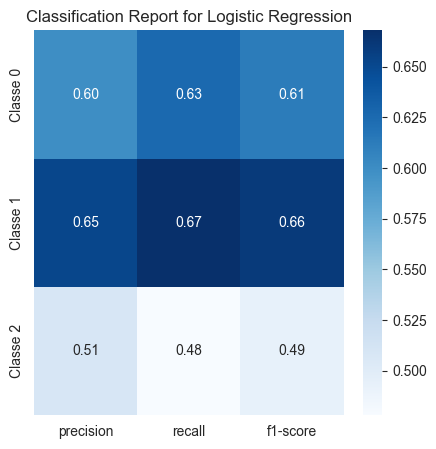

--------------------------------------------------------------------------------
TUNING & TRAINING [Decision Tree Classifier]...

Results after GridSearchCV:
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score: {'accuracy': 0.5701}

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'accuracy': 0.5606}



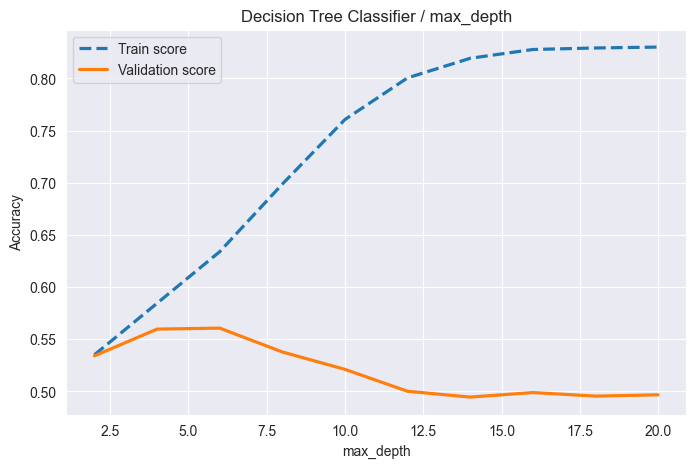

> TESTING...
Accuracy: 52.4691%


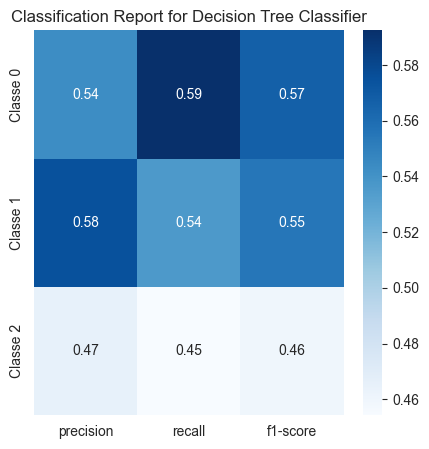

--------------------------------------------------------------------------------
TUNING & TRAINING [Random Forest Classifier]...

Results after GridSearchCV:
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 300}
Best score: {'accuracy': 0.6051}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 280}
Best score: {'accuracy': 0.6060}



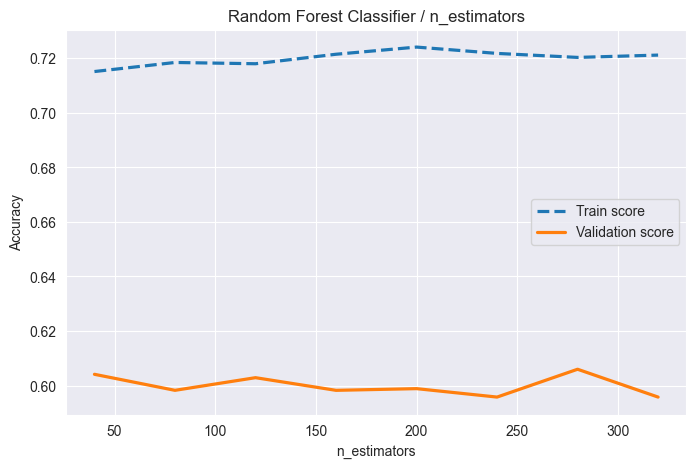

Results after max_depth tuning:
Best parameters: {'max_depth': 18}
Best score: {'accuracy': 0.6007}



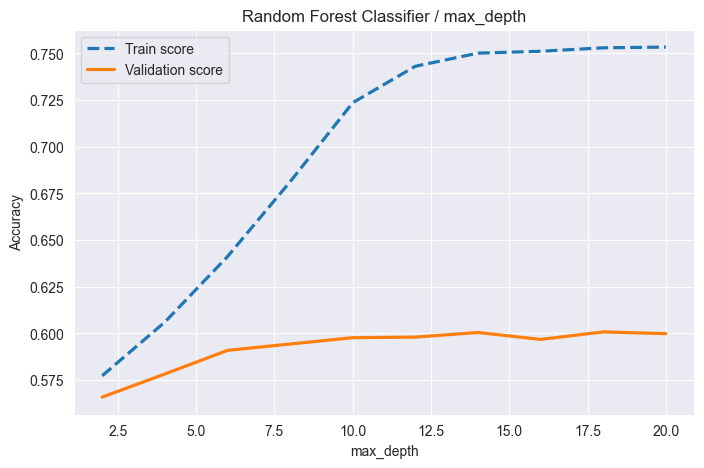

> TESTING...
Accuracy: 59.0123%


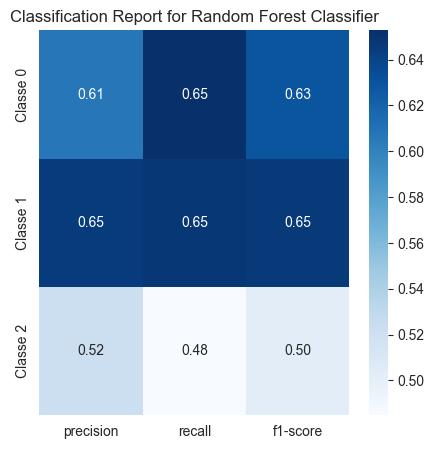

--------------------------------------------------------------------------------
TUNING & TRAINING [XGBoost Classifier]...

Results after GridSearchCV:
Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best score: {'accuracy': 0.6017}

Results after n_estimators tuning:
Best parameters: {'n_estimators': 200}
Best score: {'accuracy': 0.6017}



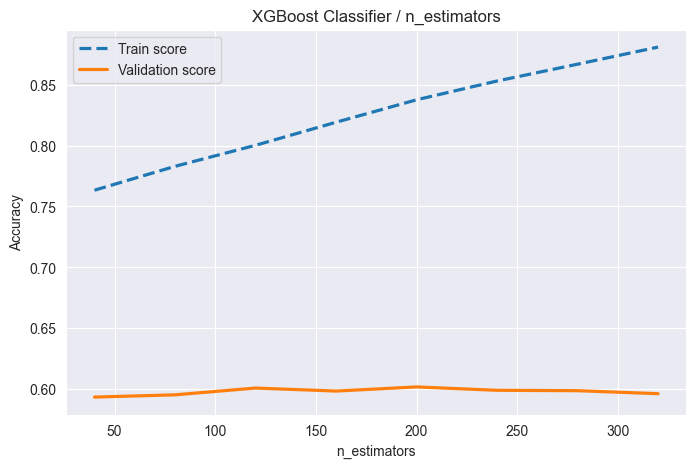

Results after max_depth tuning:
Best parameters: {'max_depth': 6}
Best score: {'accuracy': 0.5995}



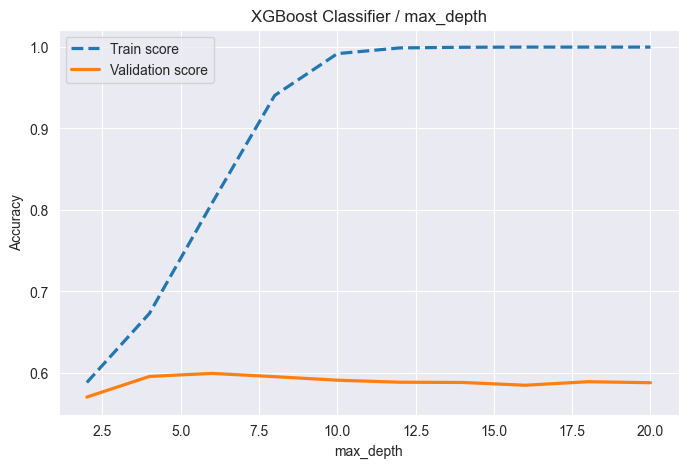

> TESTING...
Accuracy: 56.6667%


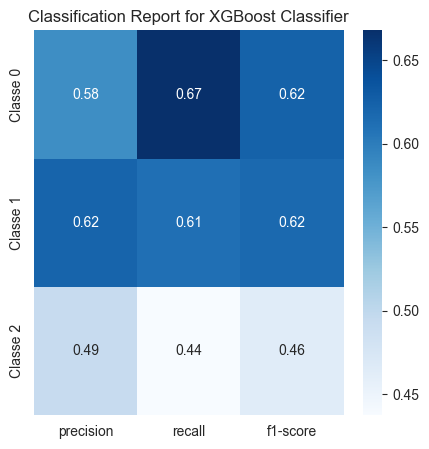

In [14]:
# tuning e testing
tune_and_test_models(df, cols, task="classification", resample=False, session_name="der")